# Retail Forecasting



## Problem Statement:

The large company who is into beverages business in Australia. They sell their products through various super-markets and also engage into heavy promotions throughout the year. Their demand is also influenced by various factors like holiday, seasonality. They needed forecast of each of products at item level every week in weekly buckets. 

In [1]:
#import data 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [2]:
forecast = pd.read_csv('./Data/newForecast.csv')
forecast.head(3)

,Unnamed: 0,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7


In [3]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1218 non-null   int64  
 1   Product          1218 non-null   object 
 2   date             1218 non-null   object 
 3   Sales            1218 non-null   int64  
 4   Discount         1218 non-null   float64
 5   In-Store Promo   1218 non-null   int64  
 6   Catalogue Promo  1218 non-null   int64  
 7   Store End Promo  1218 non-null   int64  
 8   Google_Mobility  1218 non-null   float64
 9   Covid_Flag       1218 non-null   int64  
 10  V_DAY            1218 non-null   int64  
 11  EASTER           1218 non-null   int64  
 12  CHRISTMAS        1218 non-null   int64  
 13  DayOfWeek        1218 non-null   object 
 14  Quarter          1218 non-null   int64  
 15  WeekNum          1218 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 152.4+ KB


In [4]:
forecast['date'] = pd.to_datetime(forecast['date'])

In [5]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       1218 non-null   int64         
 1   Product          1218 non-null   object        
 2   date             1218 non-null   datetime64[ns]
 3   Sales            1218 non-null   int64         
 4   Discount         1218 non-null   float64       
 5   In-Store Promo   1218 non-null   int64         
 6   Catalogue Promo  1218 non-null   int64         
 7   Store End Promo  1218 non-null   int64         
 8   Google_Mobility  1218 non-null   float64       
 9   Covid_Flag       1218 non-null   int64         
 10  V_DAY            1218 non-null   int64         
 11  EASTER           1218 non-null   int64         
 12  CHRISTMAS        1218 non-null   int64         
 13  DayOfWeek        1218 non-null   object        
 14  Quarter          1218 non-null   int64  

In [6]:
forecast.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
forecast.head(3)

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7


# Add Year

In [8]:
forecast['Year'] = forecast['date'].dt.year
forecast.head()

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum,Year
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5,2017
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6,2017
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7,2017
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,Sunday,1,8,2017
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,9,2017


# Add Month

In [9]:
forecast['Month'] = forecast['date'].dt.month
forecast.head()

,Product,date,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum,Year,Month
0,SKU1,2017-02-05,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5,2017,2
1,SKU1,2017-02-12,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6,2017,2
2,SKU1,2017-02-19,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7,2017,2
3,SKU1,2017-02-26,26789,0.00,1,0,1,0.0,0,0,0,0,Sunday,1,8,2017,2
4,SKU1,2017-03-05,41999,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,9,2017,3


# EDA

In [10]:
#set color 

color = sns.color_palette("Purples_r", 10)
palette = "Purples"

#BuPu
#palette_tab = cubehelix_palette()

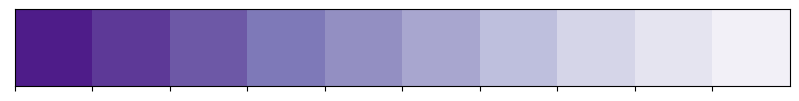

In [11]:
sns.palplot(color)

In [12]:
#seperate by product

product1 = forecast[forecast["Product"] == "SKU1"]
product2 = forecast[forecast["Product"] == "SKU2"]
product3 = forecast[forecast["Product"] == "SKU3"]
product4 = forecast[forecast["Product"] == "SKU4"]
product5 = forecast[forecast["Product"] == "SKU5"]
product6 = forecast[forecast["Product"] == "SKU6"]

## Bar plot of products count

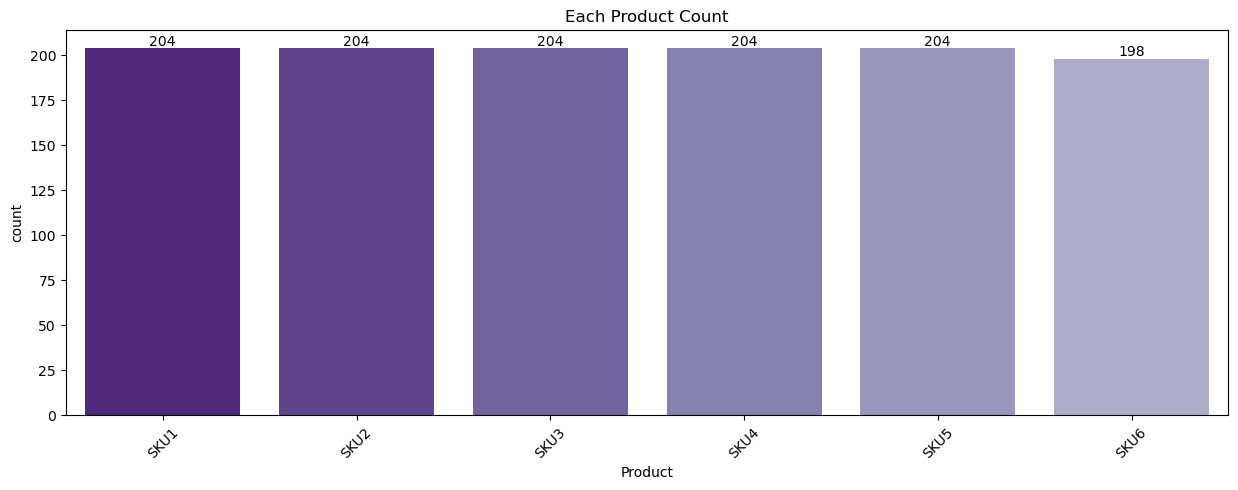

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

plt.title("Each Product Count")

sns.countplot(data=forecast, x="Product", palette=color)

for container in ax.containers:
    ax.bar_label(container)

Product 6 has slightly less amount of products sold.

## Sales amount of each product 

In [14]:
ts = forecast.groupby(["Product"])["Sales"].apply(lambda x : x.astype(int).sum())
ts = ts.to_frame()
ts.reset_index(inplace=True)
ts = ts.sort_values('Sales', ascending=False)
ts.head()

,Product,Sales
2,SKU3,11390081
0,SKU1,9694468
5,SKU6,7500918
3,SKU4,3463211
4,SKU5,3360089


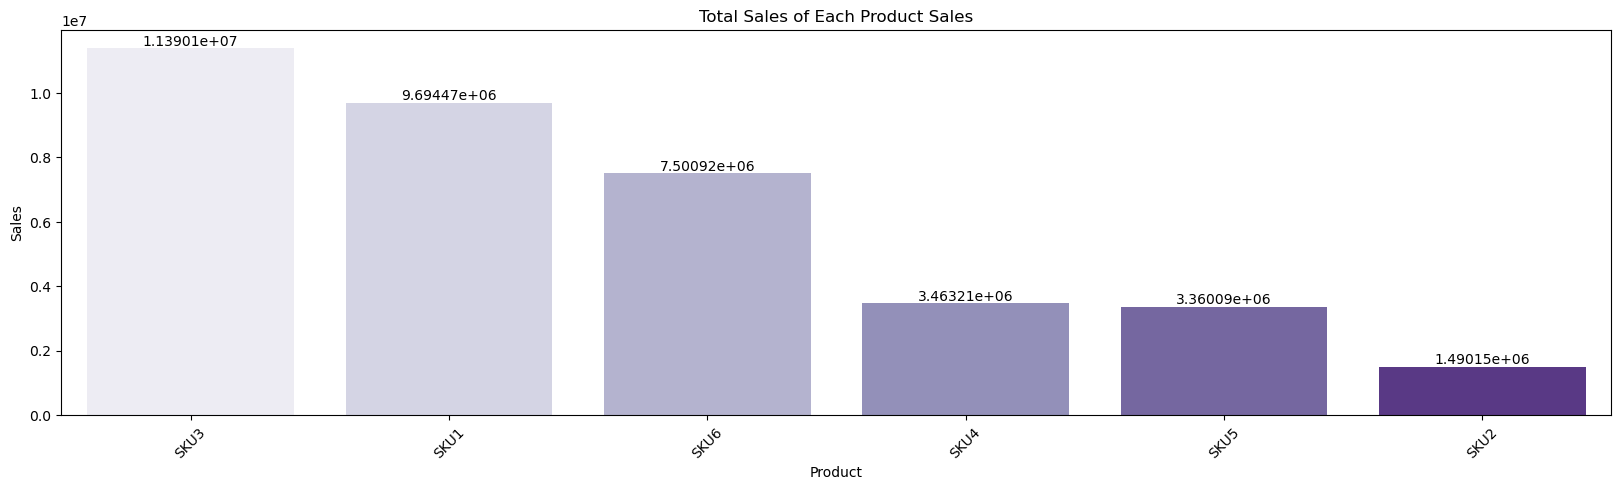

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Total Sales of Each Product Sales")

sns.barplot(data=ts, x="Product", y="Sales", palette=palette)

for container in ax.containers:
    ax.bar_label(container)

## Change overtime of all sales

<AxesSubplot:title={'center':'Change overtime of all sales'}, xlabel='date', ylabel='Sales'>

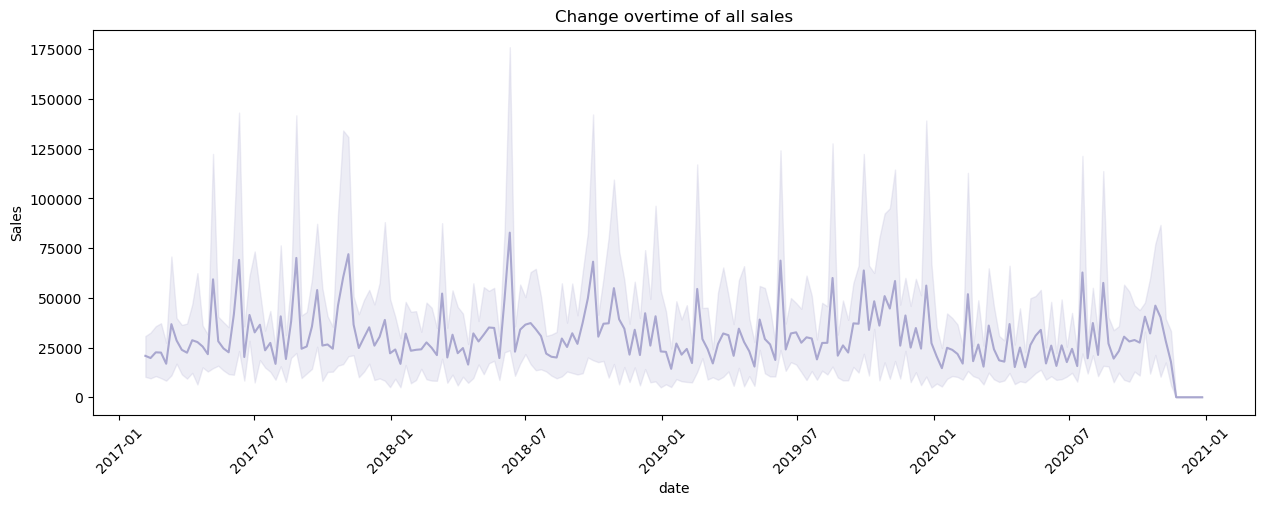

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

plt.title("Change overtime of all sales")

sns.lineplot(data=forecast, x="date", y="Sales", color=color[5])

## Sales Based on Product

<AxesSubplot:title={'center':'Sales Based on Product'}, xlabel='date', ylabel='Sales'>

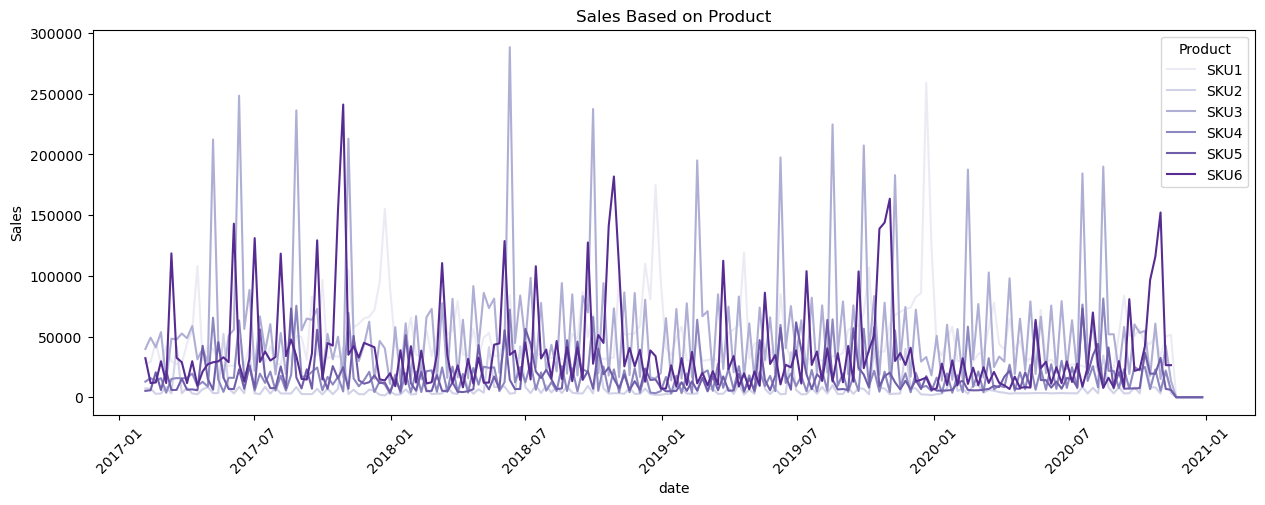

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 45)

plt.title("Sales Based on Product")

sns.lineplot(data=forecast, x="date", y="Sales", hue="Product", palette=palette)

## Sales Based on Product over time

[Text(0.5, 1.0, 'Product 6')]

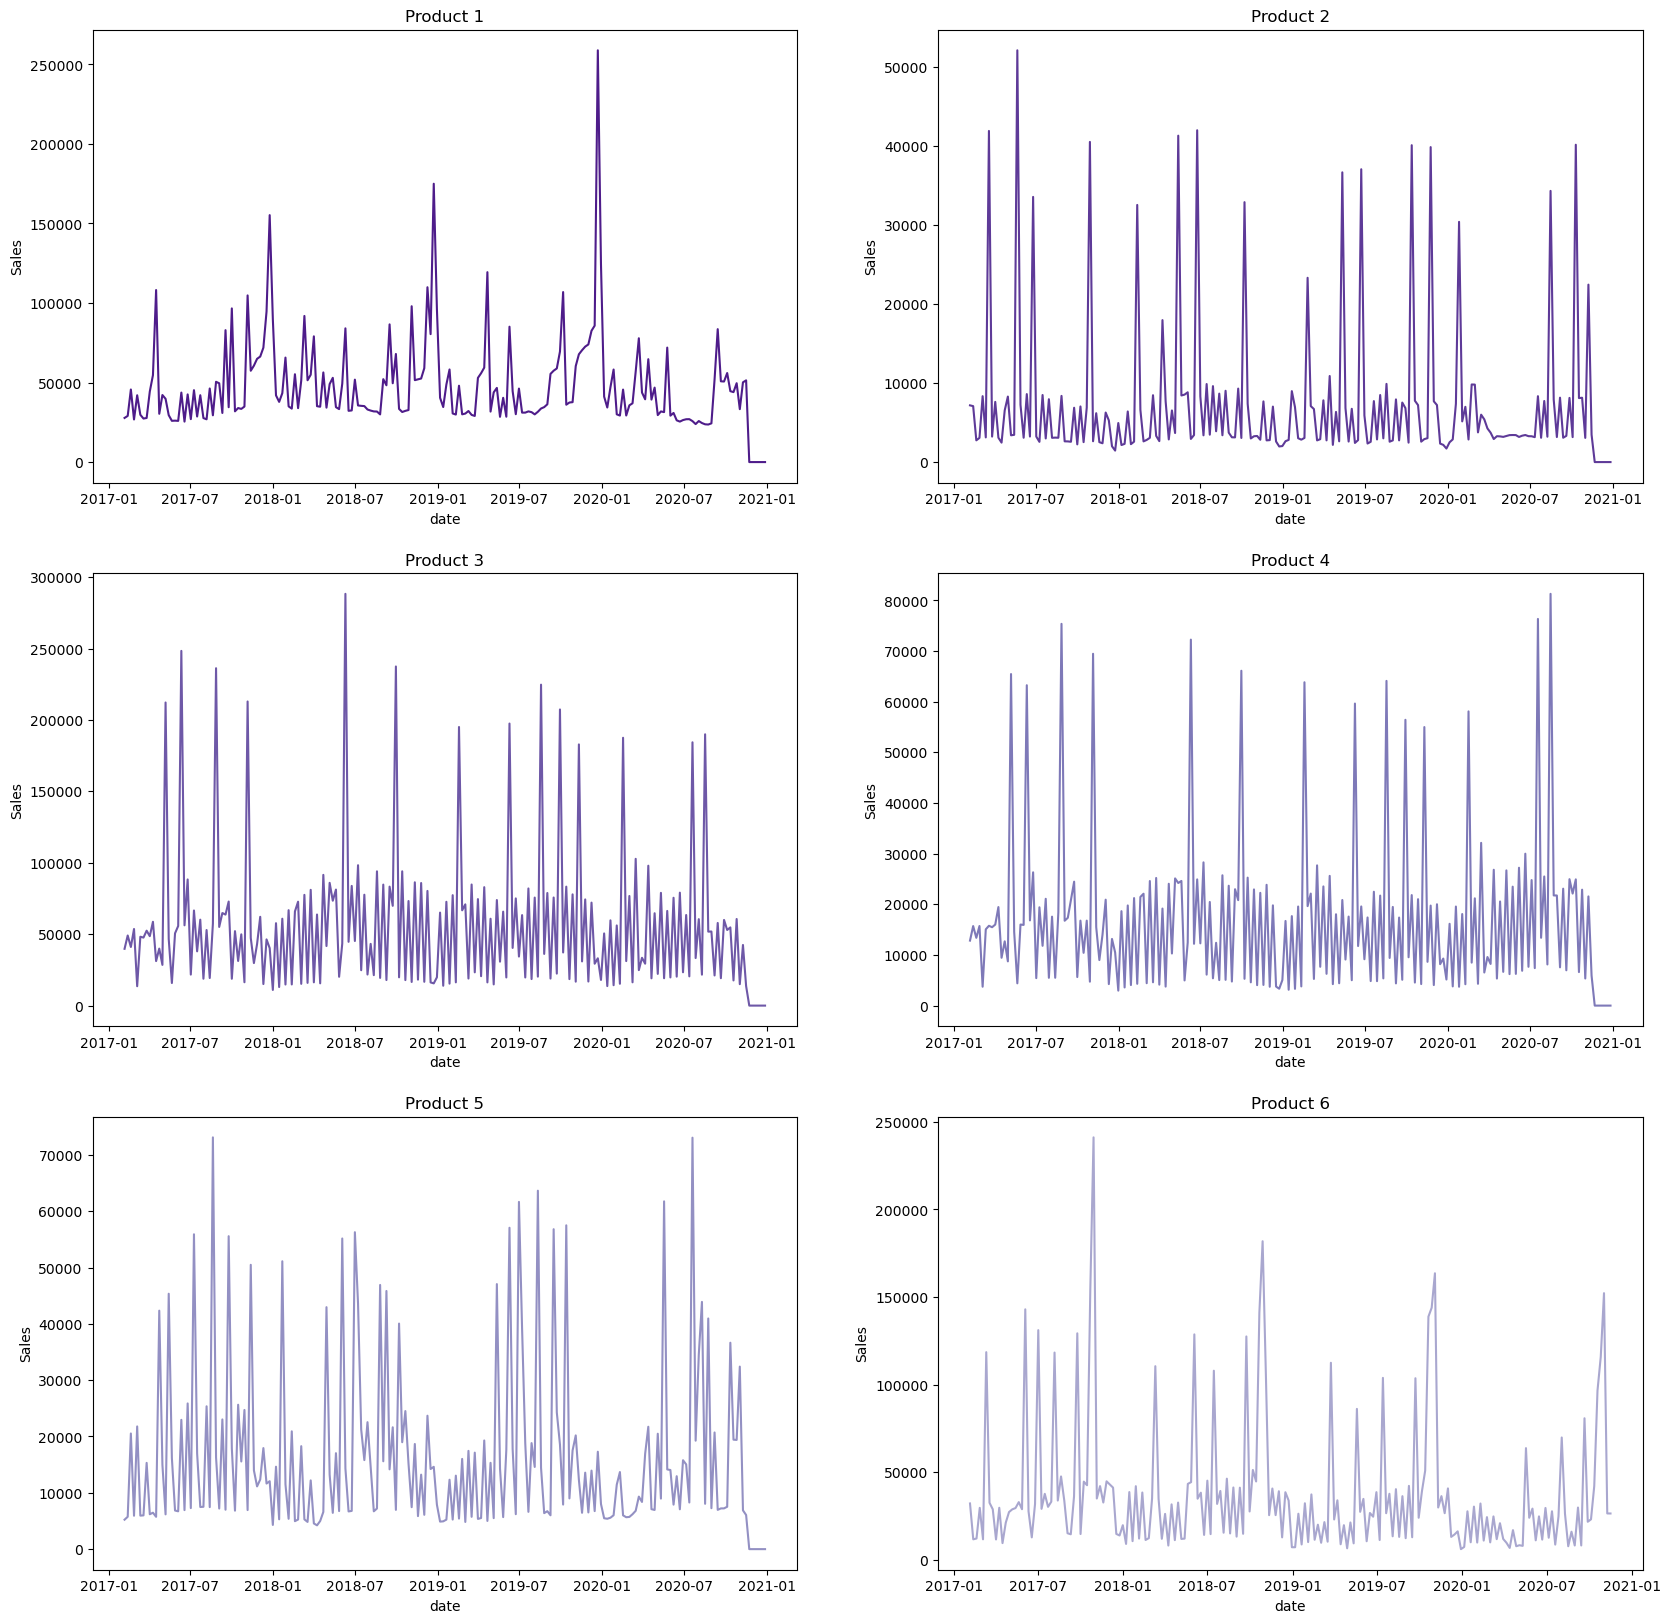

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

#Product 1
sns.lineplot(data=product1, x="date", y = "Sales", 
             color=color[0], ax=axs[0, 0]).set(title="Product 1")
#Product 2
sns.lineplot(data=product2, x="date", y = "Sales", 
             color=color[1], ax=axs[0, 1]).set(title="Product 2")

#Product 3
sns.lineplot(data=product3, x="date", y = "Sales", 
             color=color[2], ax=axs[1, 0]).set(title="Product 3")
#Product 4
sns.lineplot(data=product4, x="date", y = "Sales", 
             color=color[3], ax=axs[1, 1]).set(title="Product 4")

#Product 5
sns.lineplot(data=product5, x="date", y = "Sales", 
             color=color[4], ax=axs[2, 0]).set(title="Product 5")
#Product 6
sns.lineplot(data=product6, x="date", y = "Sales", 
             color=color[5], ax=axs[2, 1]).set(title="Product 6")


## Distributions of monlthy sales over time

<AxesSubplot:title={'center':'Distributions of Monthly Sales Over Time'}, xlabel='Year,Month'>

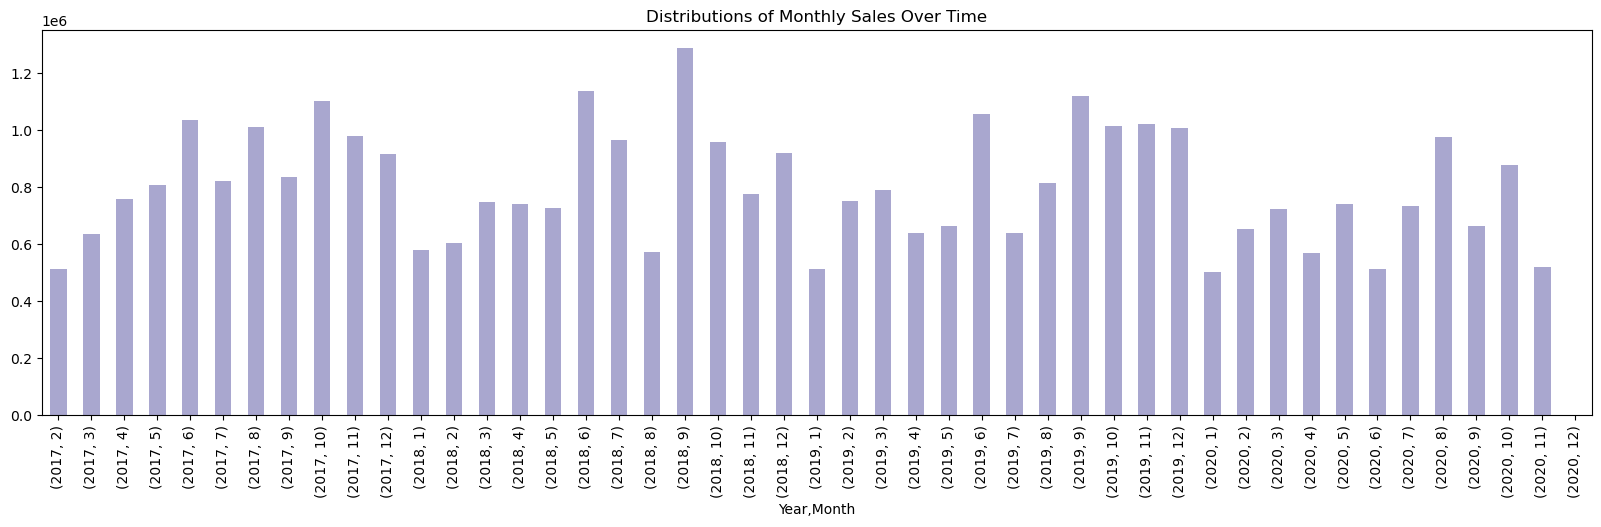

In [19]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Monthly Sales Over Time")

year_month_sales = forecast.groupby(["Year", "Month"])["Sales"].apply(lambda x : x.astype(int).sum())

year_month_sales.plot(kind="bar", color=color[5])

<AxesSubplot:title={'center':'Distributions of Monthly Sales Over Time'}, xlabel='Year,Month'>

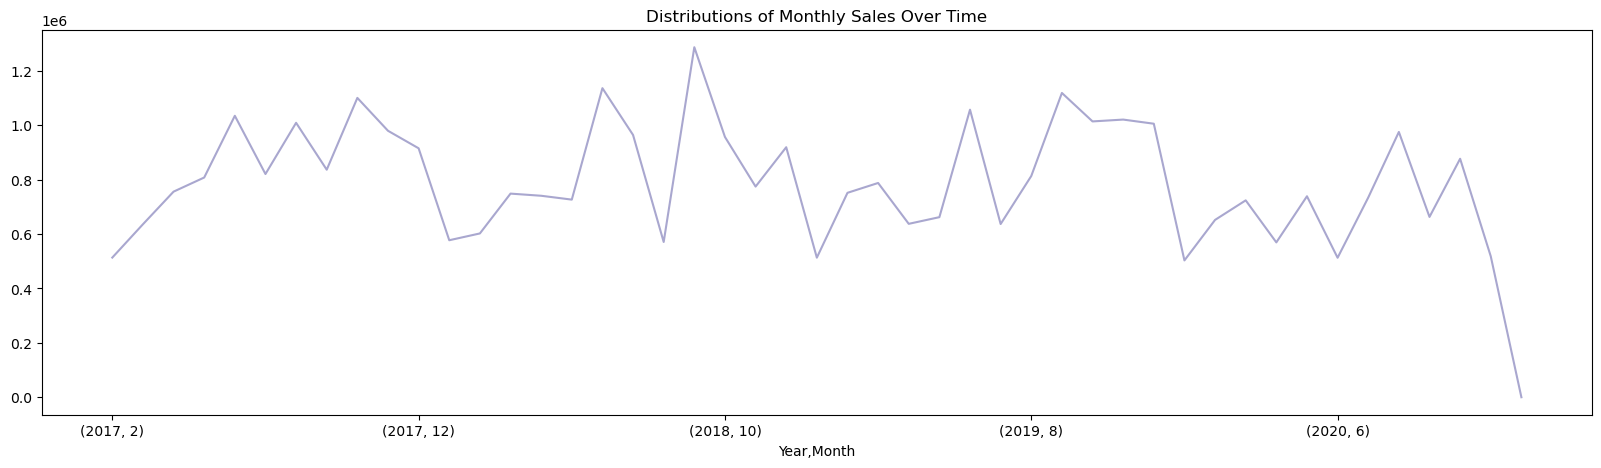

In [20]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Monthly Sales Over Time")

year_month_sales.plot(kind="line", color=color[5])

## Distributions of Monthly Sales Over Time Based On Product

In [21]:
mps = forecast.groupby(["Year", "Month", "Product"])["Sales"].apply(lambda x : x.astype(int).sum())

mps = mps.to_frame()
mps.reset_index(inplace=True)
mps.head()

,Year,Month,Product,Sales
0,2017,2,SKU1,129192
1,2017,2,SKU2,20075
2,2017,2,SKU3,183538
3,2017,2,SKU4,57631
4,2017,2,SKU5,37441


<AxesSubplot:title={'center':'Distributions of Monthly Sales Over Time Based On Product'}, xlabel='Month', ylabel='Sales'>

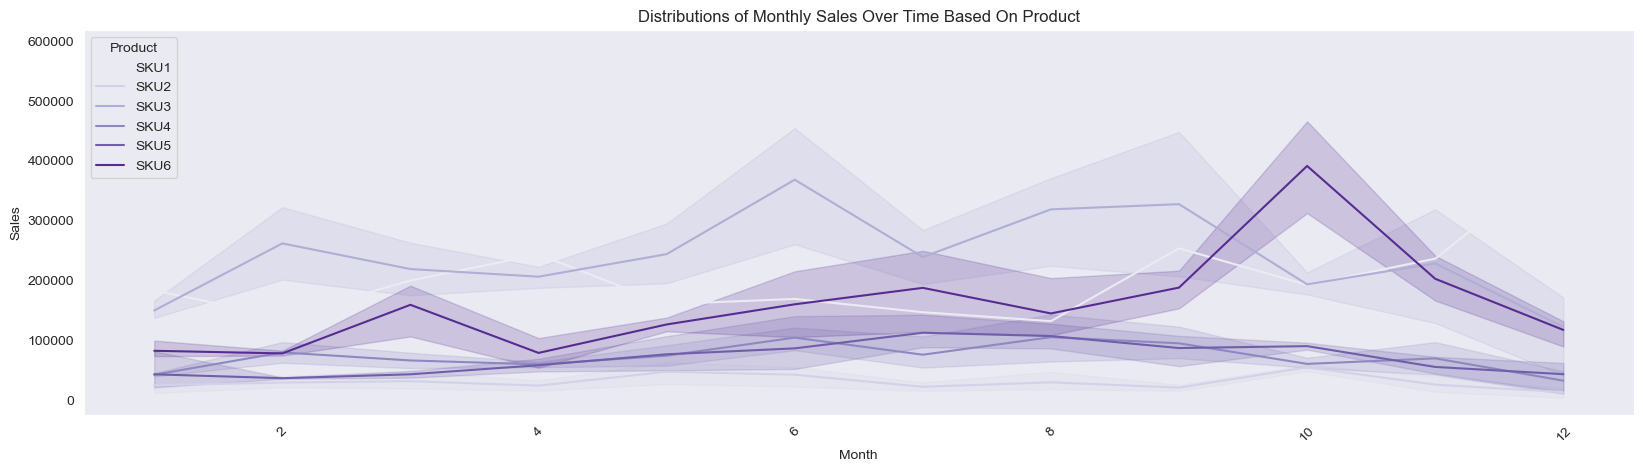

In [52]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Monthly Sales Over Time Based On Product")
sns.set_style("dark")
sns.lineplot(data = mps, x="Month", y="Sales", hue="Product", palette=palette)

<AxesSubplot:title={'center':'Distributions of Monthly Sales Over Time Based On Product'}, xlabel='Month', ylabel='Sales'>

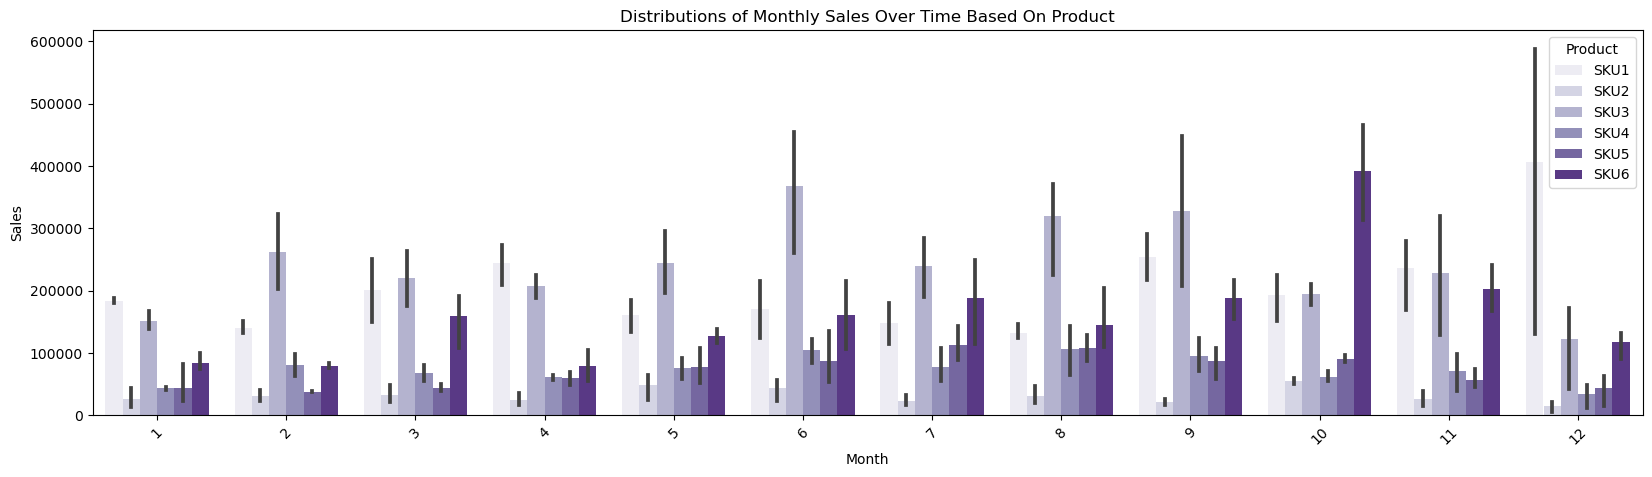

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Monthly Sales Over Time Based On Product")
sns.barplot(data = mps, x="Month", y="Sales", hue="Product", palette=palette)

## Distributions of Quarter Sales Over Time

<AxesSubplot:title={'center':'Distributions of Quarter Sales Over Time'}, xlabel='Year,Quarter'>

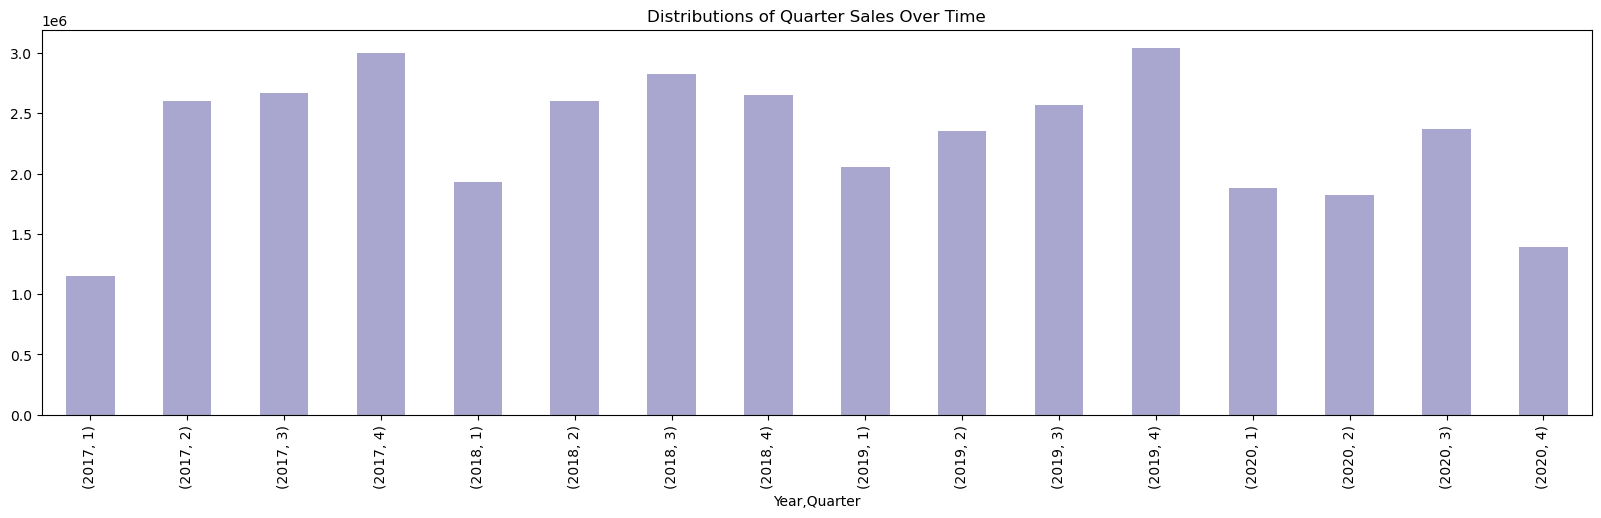

In [24]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Quarter Sales Over Time")

year_quarter_sales = forecast.groupby(["Year", "Quarter"])["Sales"].apply(lambda x : x.astype(int).sum())

year_quarter_sales.plot(kind="bar", color=color[5])


<AxesSubplot:title={'center':'Distributions of Quarter Sales Over Time'}, xlabel='Year,Quarter'>

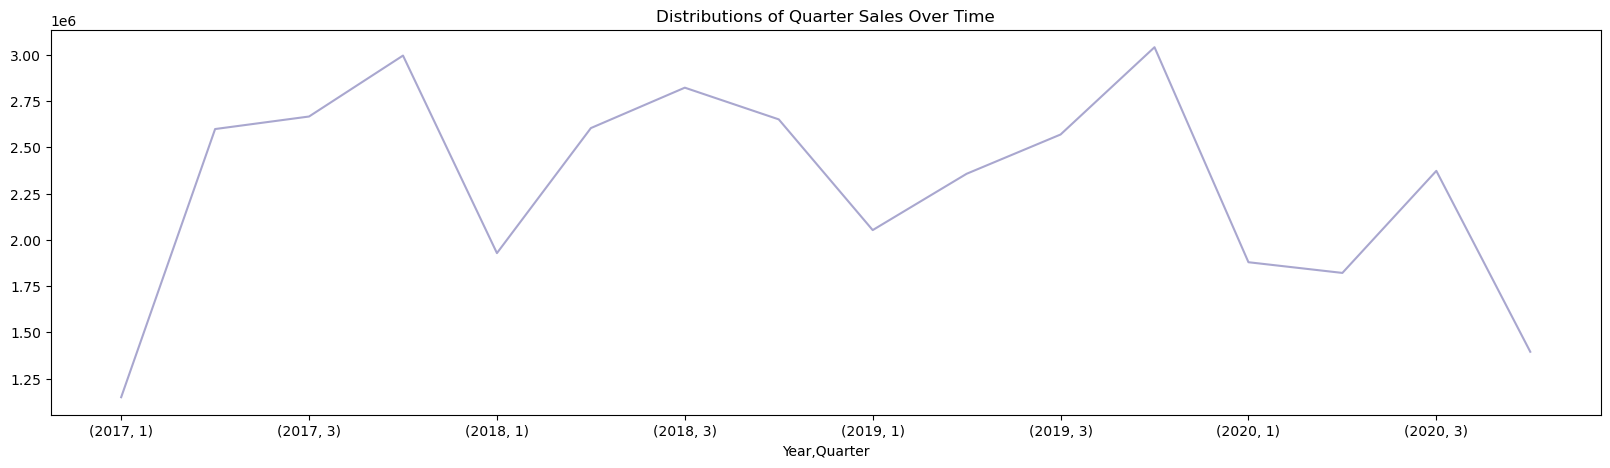

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Quarter Sales Over Time")

year_quarter_sales.plot(kind="line", color=color[5])

## Distributions of Quarter Sales Over Time Based On Product

In [26]:
qtr_prod_sales = forecast.groupby(["Year", "Quarter", "Product"])["Sales"].apply(
    lambda x : x.astype(int).sum())

qtr_prod_sales = qtr_prod_sales.to_frame()
qtr_prod_sales.reset_index(inplace=True)
qtr_prod_sales.head()

,Year,Quarter,Product,Sales
0,2017,1,SKU1,256009
1,2017,1,SKU2,76682
2,2017,1,SKU3,345426
3,2017,1,SKU4,107659
4,2017,1,SKU5,86491


<AxesSubplot:title={'center':'Distributions of Quarter Sales Over Time Based On Product'}, xlabel='Quarter', ylabel='Sales'>

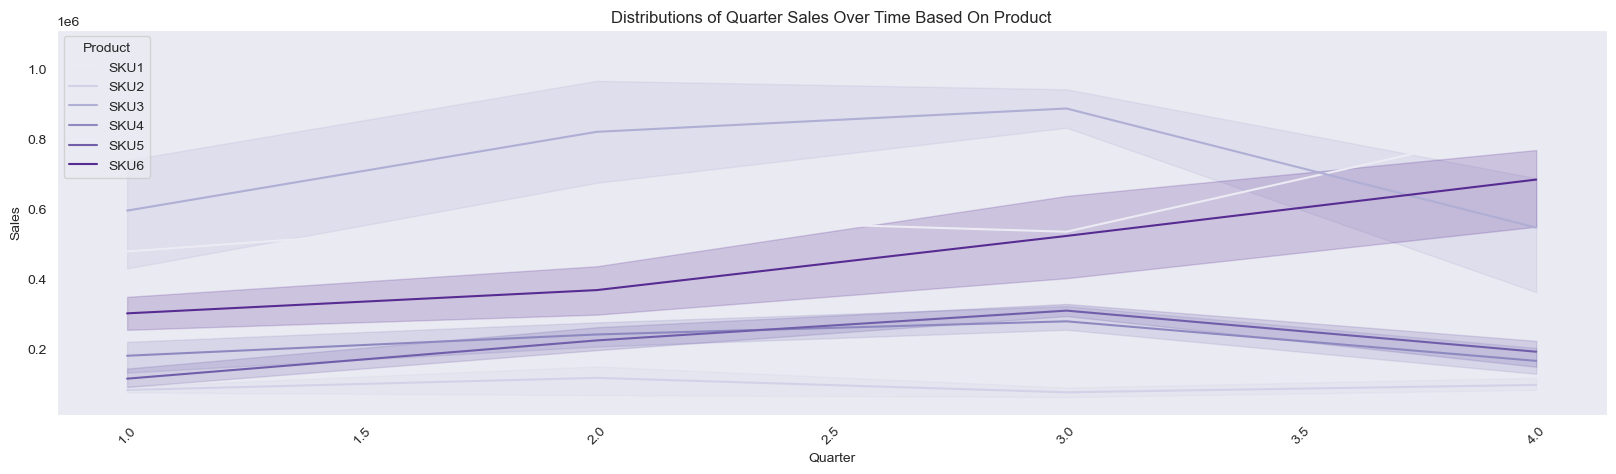

In [54]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Quarter Sales Over Time Based On Product")

sns.lineplot(data = qtr_prod_sales, x="Quarter", y="Sales", hue="Product", palette=palette)

<AxesSubplot:title={'center':'Distributions of Quarter Sales Over Time Based On Product'}, xlabel='Quarter', ylabel='Sales'>

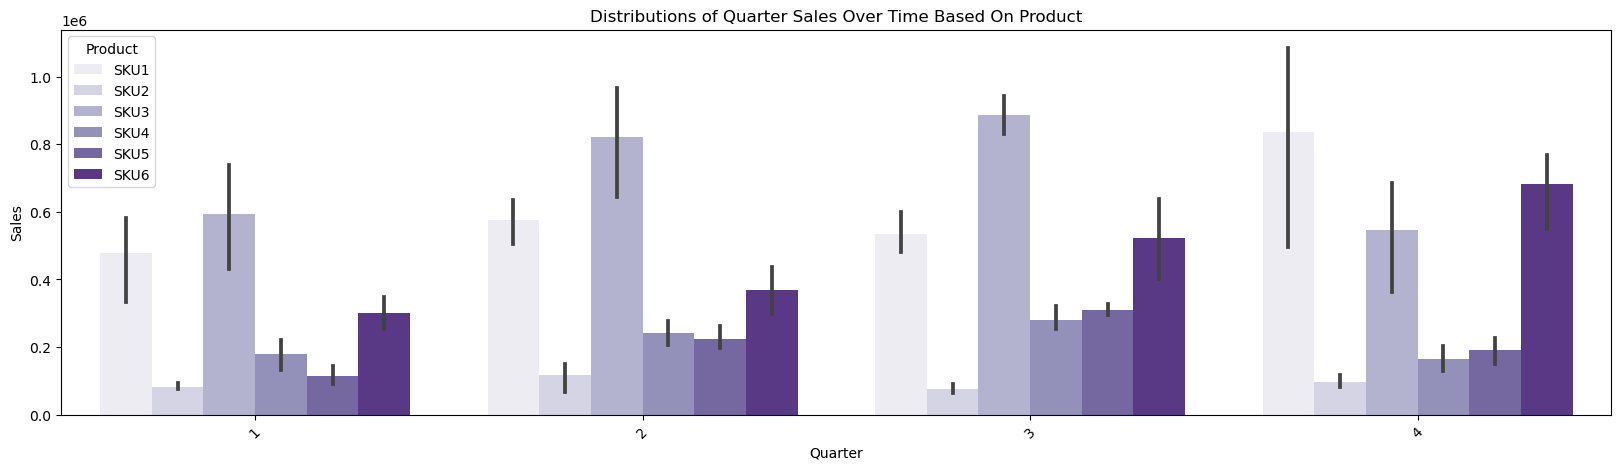

In [28]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Distributions of Quarter Sales Over Time Based On Product")
sns.barplot(data = qtr_prod_sales, x="Quarter", y="Sales", hue="Product", palette=palette)


## Average Quarter Sales over time

In [29]:
avgqtr = forecast.groupby(["Year", "Quarter"])["Sales"].mean()
#avgqtr = forecast.groupby(pd.PeriodIndex(forecast['date'], freq="M"))['Sales'].mean()
avgqtr = avgqtr.to_frame()
avgqtr.reset_index(inplace=True)

avgqtr["Sales"] = avgqtr["Sales"].apply(lambda x: round(x, 2)) 

avgqtr.head()

,Year,Quarter,Sales
0,2017,1,23945.00
1,2017,2,33312.92
2,2017,3,34180.90
3,2017,4,35659.13
4,2018,1,26777.65


In [30]:
avgqtr['date'] = avgqtr['Year'].astype(str) +"-"+ avgqtr['Quarter'].astype(str)
avgqtr.head()

,Year,Quarter,Sales,date
0,2017,1,23945.00,2017-1
1,2017,2,33312.92,2017-2
2,2017,3,34180.90,2017-3
3,2017,4,35659.13,2017-4
4,2018,1,26777.65,2018-1


<AxesSubplot:title={'center':'Average Quarter Sales Over Time'}, xlabel='date', ylabel='Sales'>

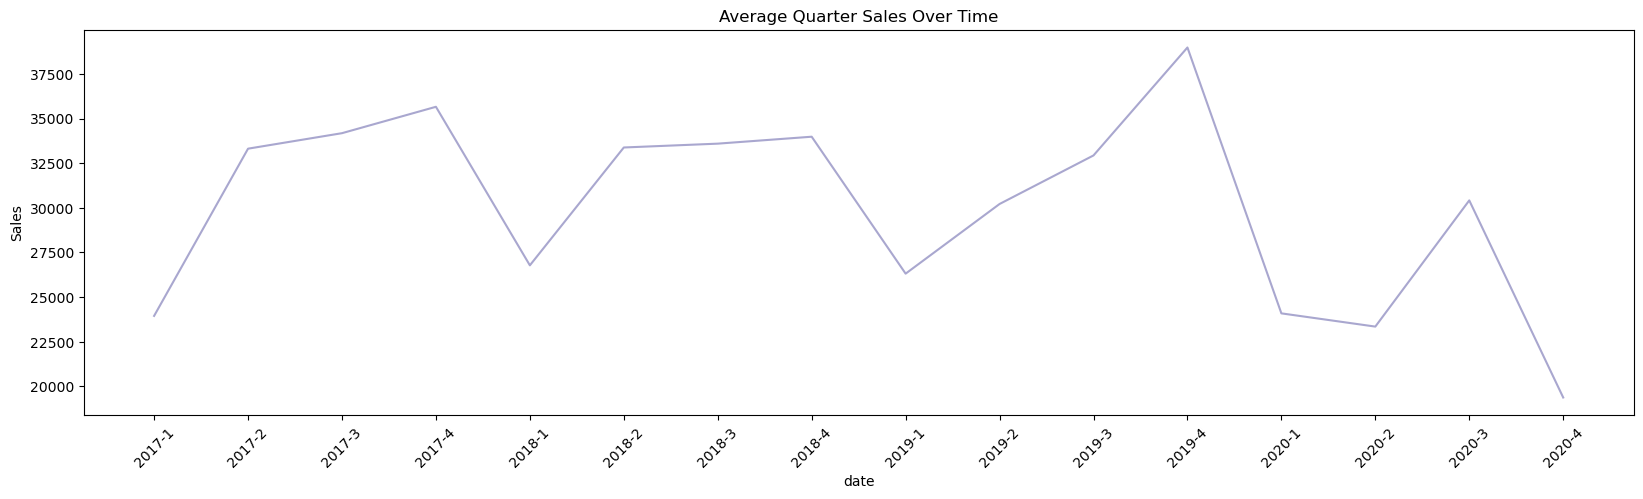

In [31]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Quarter Sales Over Time")

sns.lineplot(data = avgqtr, x="date", y="Sales", color=color[5])

<AxesSubplot:title={'center':'Average Quarter Sales Over Time'}, xlabel='date', ylabel='Sales'>

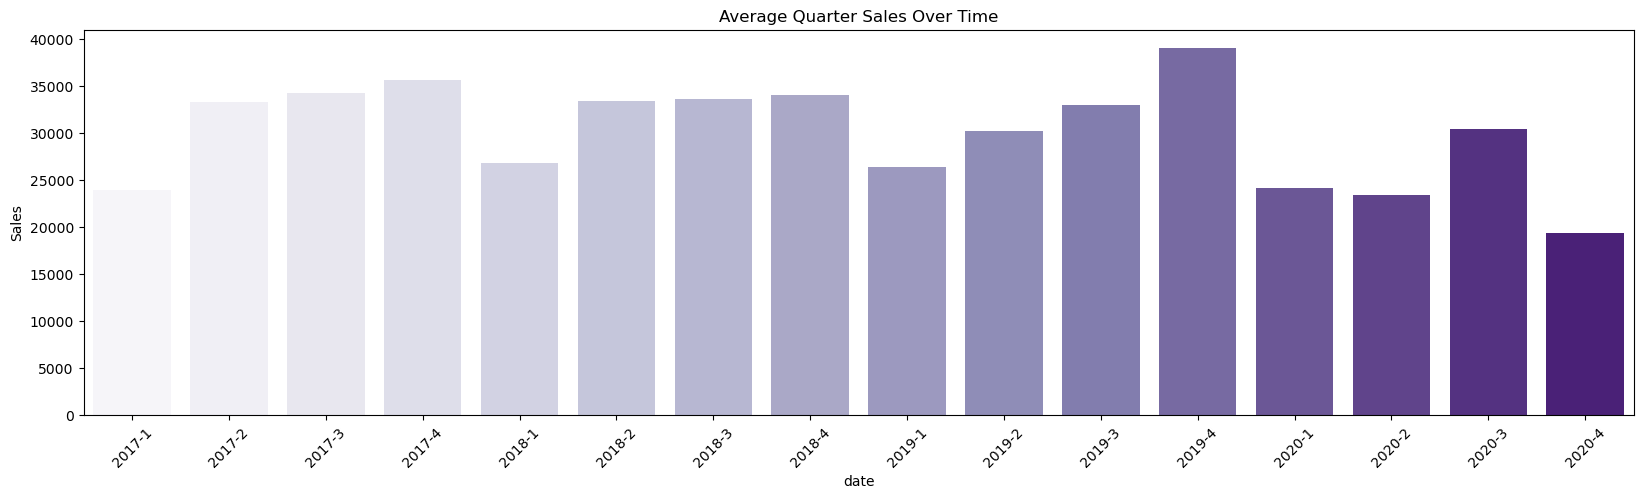

In [32]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Quarter Sales Over Time")

sns.barplot(data = avgqtr, x="date", y="Sales", palette=palette)

## Average Quarter Sales per Product over time

In [33]:
avgqtr_prod = forecast.groupby(["Year", "Quarter", "Product"])["Sales"].mean()
avgqtr_prod = avgqtr_prod.to_frame()
avgqtr_prod.reset_index(inplace=True)

avgqtr_prod["Sales"] = avgqtr_prod["Sales"].apply(lambda x: round(x, 2)) 
avgqtr_prod['date'] = avgqtr_prod['Year'].astype(str) +"-"+ avgqtr_prod['Quarter'].astype(str)

avgqtr_prod.head()

,Year,Quarter,Product,Sales,date
0,2017,1,SKU1,32001.12,2017-1
1,2017,1,SKU2,9585.25,2017-1
2,2017,1,SKU3,43178.25,2017-1
3,2017,1,SKU4,13457.38,2017-1
4,2017,1,SKU5,10811.38,2017-1


<AxesSubplot:title={'center':'Average Quarter Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

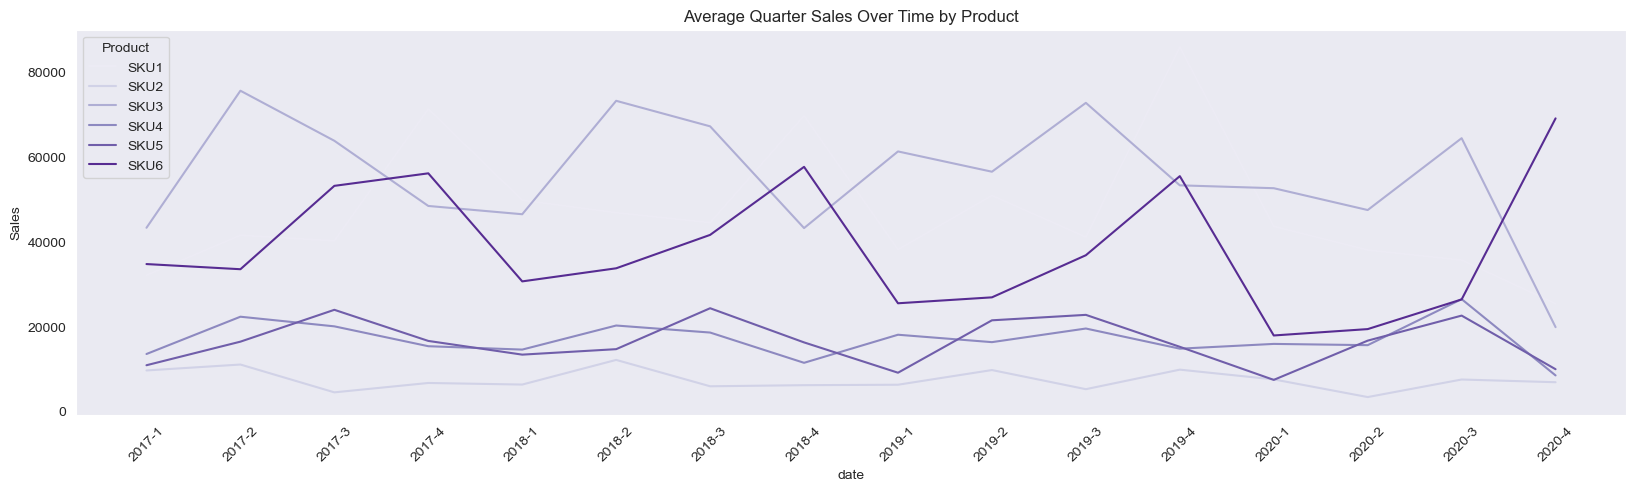

In [55]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Quarter Sales Over Time by Product")
sns.set_style("dark")

sns.lineplot(data = avgqtr_prod, x="date", y="Sales", hue="Product", palette=palette)

<AxesSubplot:title={'center':'Average Quarter Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

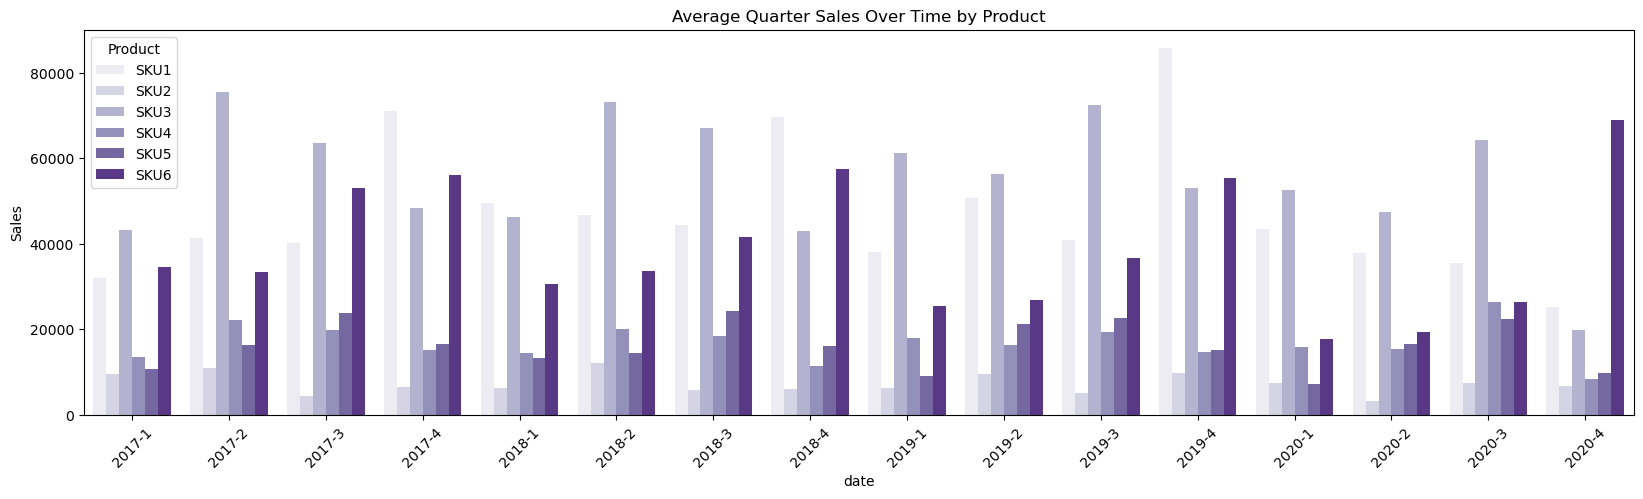

In [35]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Quarter Sales Over Time by Product")

sns.barplot(data = avgqtr_prod, x="date", y="Sales", hue="Product", palette=palette)

# Average Monthly Sales Over Time

In [36]:
avgmth = forecast.groupby(["Year", "Month"])["Sales"].mean()
avgmth = avgmth.to_frame()
avgmth.reset_index(inplace=True)

avgmth["Sales"] = avgmth["Sales"].apply(lambda x: round(x, 2)) 
avgmth['date'] = avgmth['Year'].astype(str) +"-"+ avgmth['Month'].astype(str)

avgmth.head()

,Year,Month,Sales,date
0,2017,2,21393.71,2017-2
1,2017,3,26496.29,2017-3
2,2017,4,25195.07,2017-4
3,2017,5,33658.67,2017-5
4,2017,6,43114.50,2017-6


<AxesSubplot:title={'center':'Average Monthly Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

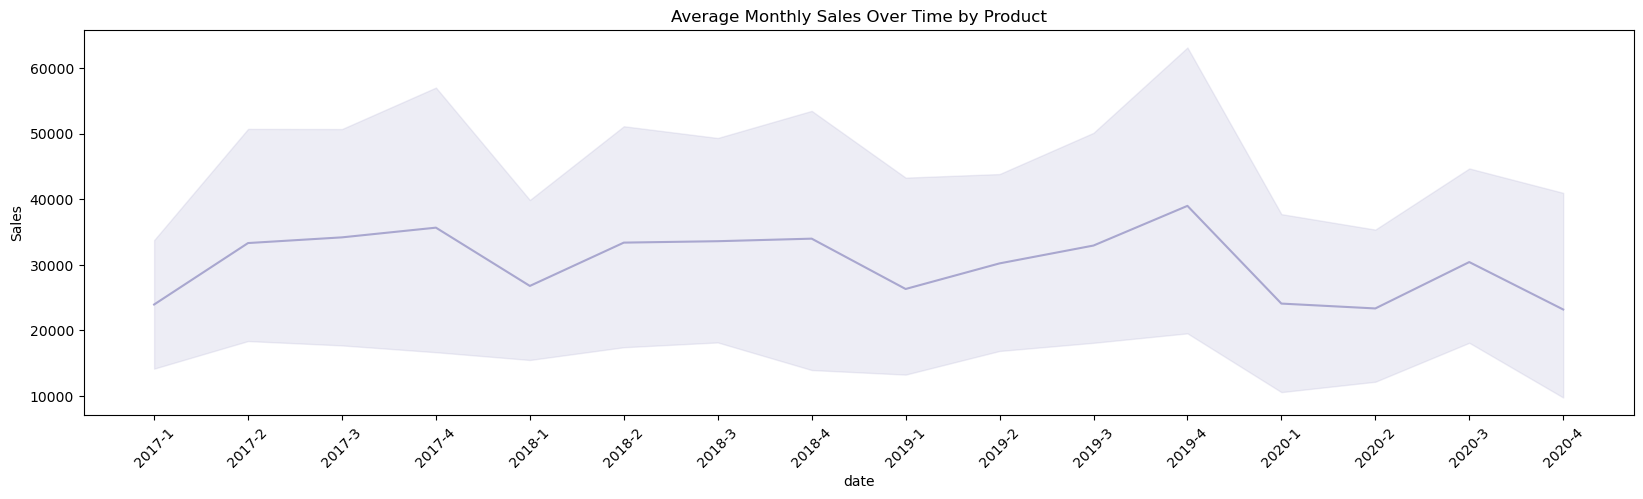

In [37]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Monthly Sales Over Time by Product")

sns.lineplot(data = avgqtr_prod, x="date", y="Sales", color=color[5])

<AxesSubplot:title={'center':'Average Monthly Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

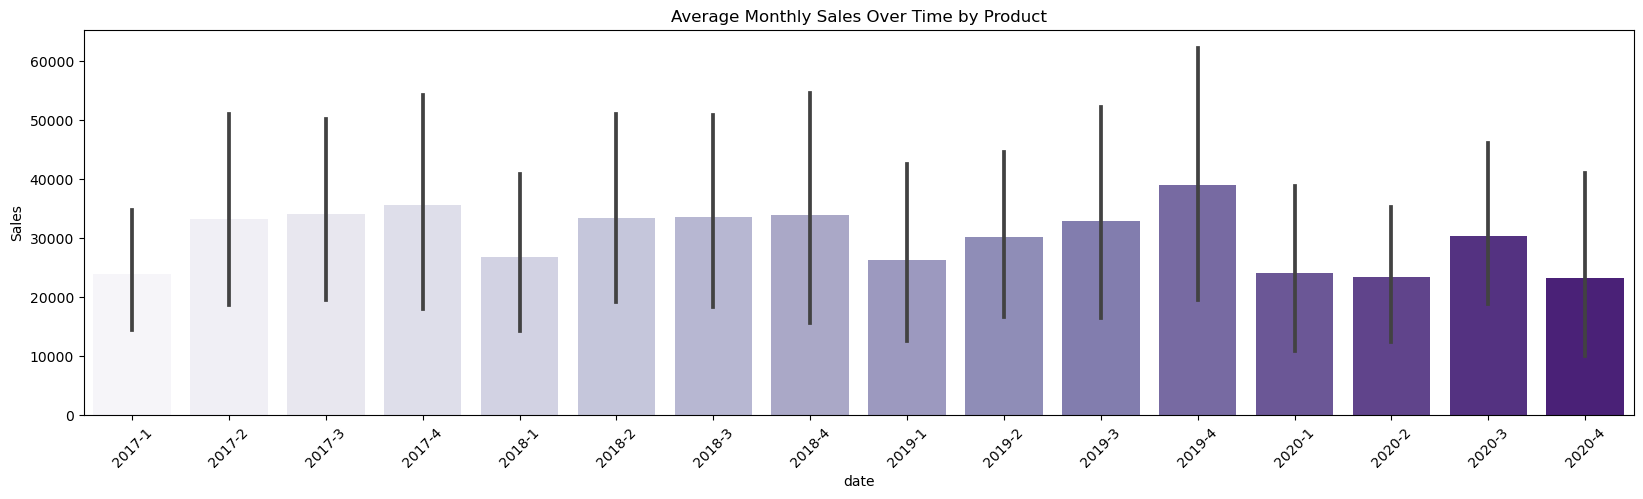

In [38]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Monthly Sales Over Time by Product")

sns.barplot(data = avgqtr_prod, x="date", y="Sales", palette=palette)

## Average Monthly Sales Over Time by Product

In [39]:
avgmth_prod = forecast.groupby(["Year", "Month", "Product"])["Sales"].mean()
#avgqtr = forecast.groupby(pd.PeriodIndex(forecast['date'], freq="M"))['Sales'].mean()
avgmth_prod = avgmth_prod.to_frame()
avgmth_prod.reset_index(inplace=True)

avgmth_prod["Sales"] = avgmth_prod["Sales"].apply(lambda x: round(x, 2)) 
avgmth_prod['date'] = avgmth_prod['Year'].astype(str) +"-"+ avgmth_prod['Month'].astype(str)

avgmth_prod.head()

,Year,Month,Product,Sales,date
0,2017,2,SKU1,32298.00,2017-2
1,2017,2,SKU2,5018.75,2017-2
2,2017,2,SKU3,45884.50,2017-2
3,2017,2,SKU4,14407.75,2017-2
4,2017,2,SKU5,9360.25,2017-2


<AxesSubplot:title={'center':'Average Monthly Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

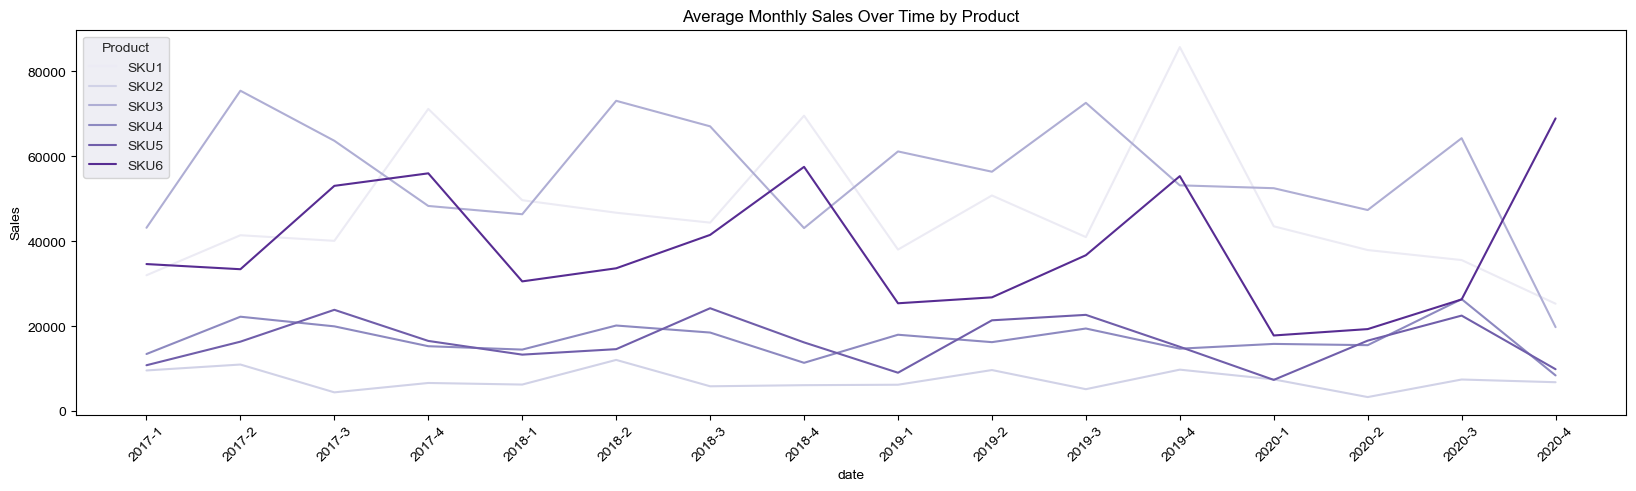

In [40]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Monthly Sales Over Time by Product")
sns.set_style("dark")

sns.lineplot(data = avgqtr_prod, x="date", y="Sales", hue="Product", palette=palette)

<AxesSubplot:title={'center':'Average Monthly Sales Over Time by Product'}, xlabel='date', ylabel='Sales'>

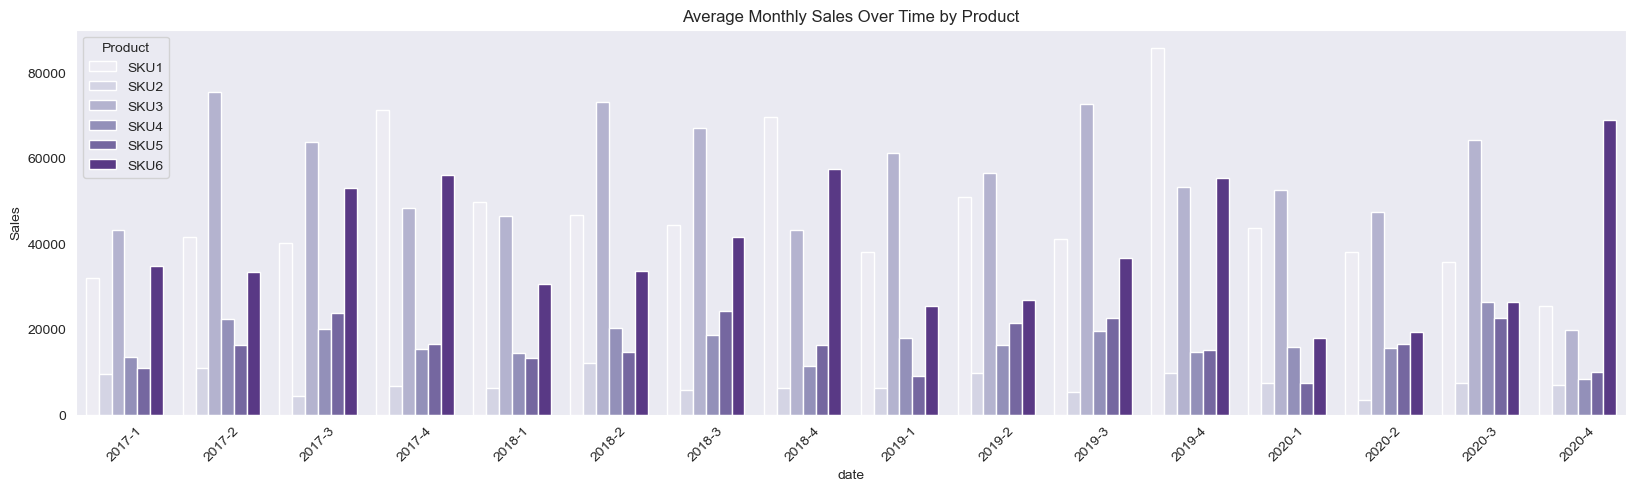

In [41]:
fig, ax = plt.subplots(figsize=(20,5))
plt.xticks(rotation = 45)

plt.title("Average Monthly Sales Over Time by Product")

sns.barplot(data = avgqtr_prod, x="date", y="Sales", hue="Product", palette=palette)

## Statsmodel

In [42]:
#set date as index
forecast.set_index('date', inplace=True)
forecast.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2017-02-05 to 2020-11-15
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product          1218 non-null   object 
 1   Sales            1218 non-null   int64  
 2   Discount         1218 non-null   float64
 3   In-Store Promo   1218 non-null   int64  
 4   Catalogue Promo  1218 non-null   int64  
 5   Store End Promo  1218 non-null   int64  
 6   Google_Mobility  1218 non-null   float64
 7   Covid_Flag       1218 non-null   int64  
 8   V_DAY            1218 non-null   int64  
 9   EASTER           1218 non-null   int64  
 10  CHRISTMAS        1218 non-null   int64  
 11  DayOfWeek        1218 non-null   object 
 12  Quarter          1218 non-null   int64  
 13  WeekNum          1218 non-null   int64  
 14  Year             1218 non-null   int64  
 15  Month            1218 non-null   int64  
dtypes: float64(2), int64(12), object(2)
memory

In [43]:
forecast.head(3)

,Product,Sales,Discount,In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS,DayOfWeek,Quarter,WeekNum,Year,Month
date,,,,,,,,,,,,,,,,
2017-02-05,SKU1,27750,0.00,0,0,0,0.0,0,0,0,0,Sunday,1,5,2017,2
2017-02-12,SKU1,29023,0.00,1,0,1,0.0,0,1,0,0,Sunday,1,6,2017,2
2017-02-19,SKU1,45630,0.17,0,0,0,0.0,0,0,0,0,Sunday,1,7,2017,2


In [44]:
#seperate by product 

product1 = forecast[forecast["Product"] == "SKU1"]
product2 = forecast[forecast["Product"] == "SKU2"]
product3 = forecast[forecast["Product"] == "SKU3"]

product4 = forecast[forecast["Product"] == "SKU4"]
product5 = forecast[forecast["Product"] == "SKU5"]
product6 = forecast[forecast["Product"] == "SKU6"]

In [45]:
def seasonalDecomp(df):
    result = seasonal_decompose(df["Sales"], model = 'add')
    
    #plt.style.use('seaborn-pastel')
    
    sns.set_palette("Purples_r")
    sns.set_style("dark")
    result.plot()
    
    #Level
    df2 = df.copy()
    df2['Sales_6M_SMA'] = df2['Sales'].rolling(window=6).mean()
    df2['Sales_12M_SMA'] = df2['Sales'].rolling(window=12).mean()
    df2[['Sales','Sales_6M_SMA','Sales_12M_SMA']].plot(figsize=(18,6))
    

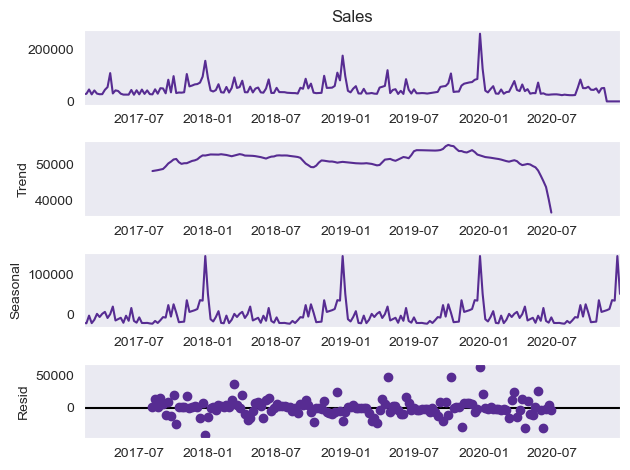

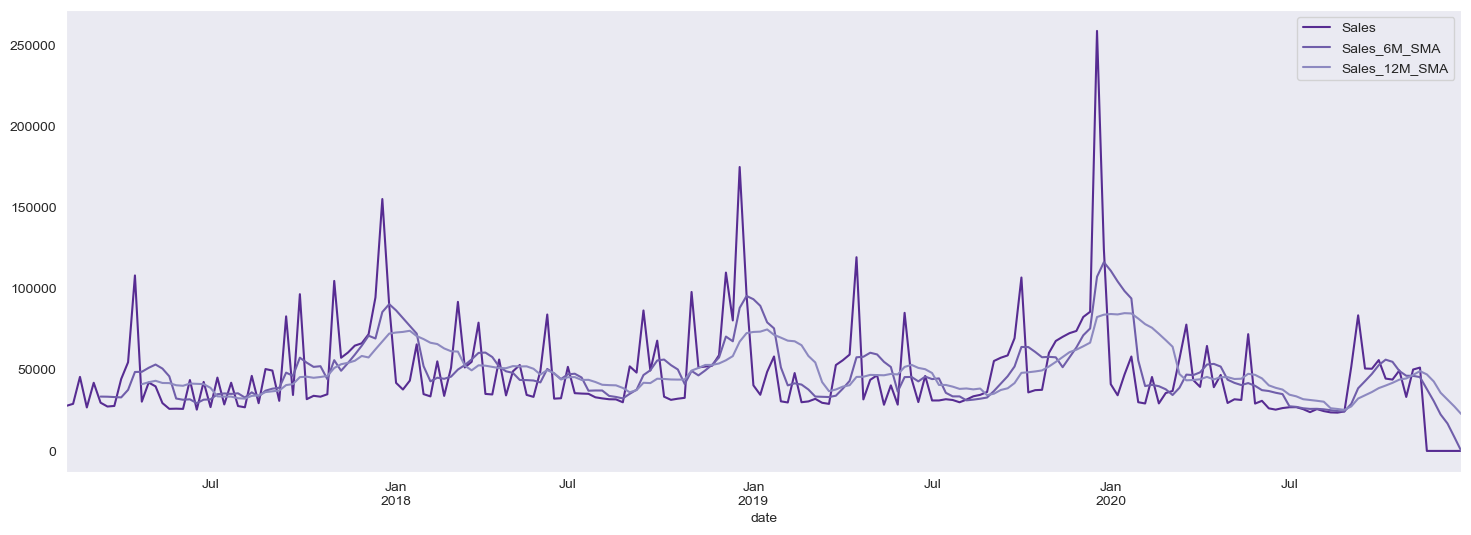

In [46]:
#Product 1
seasonalDecomp(product1)

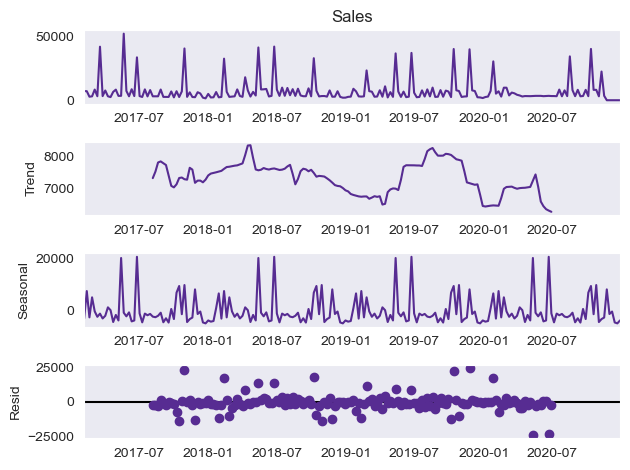

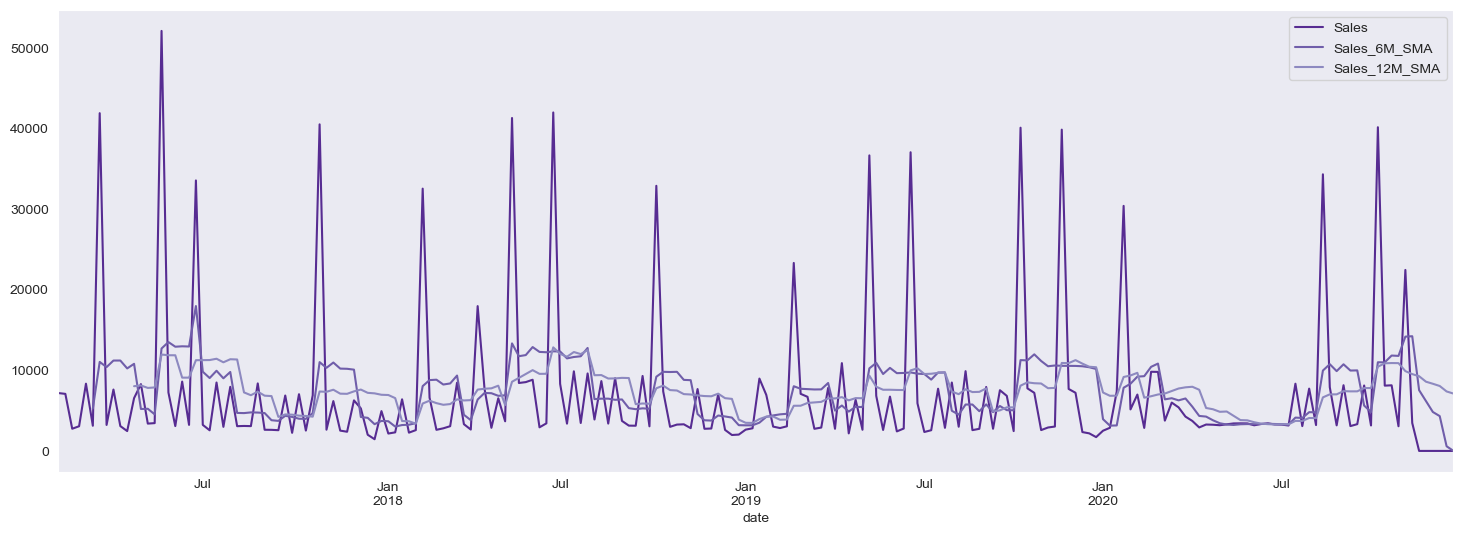

In [47]:
#Product2
seasonalDecomp(product2)

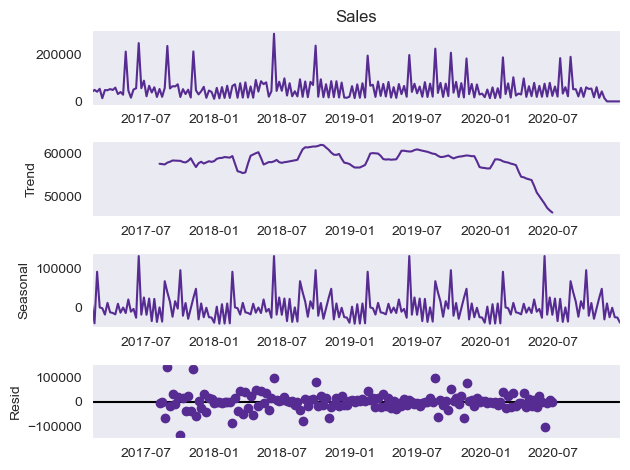

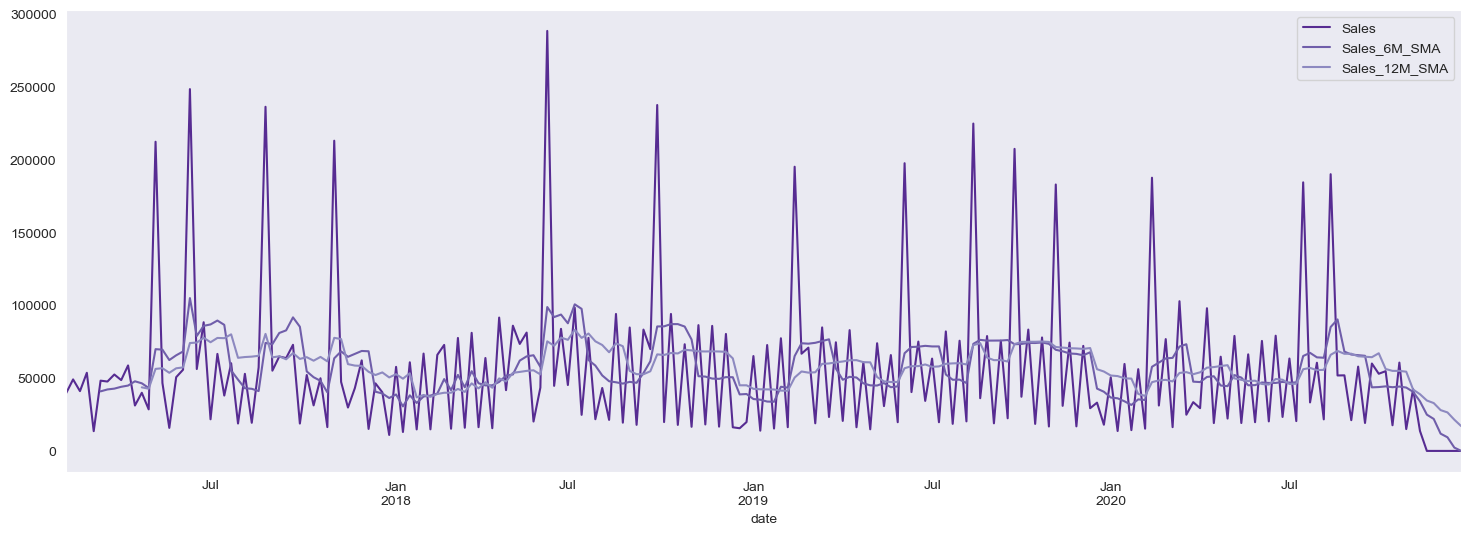

In [48]:
#Product 3
seasonalDecomp(product3)

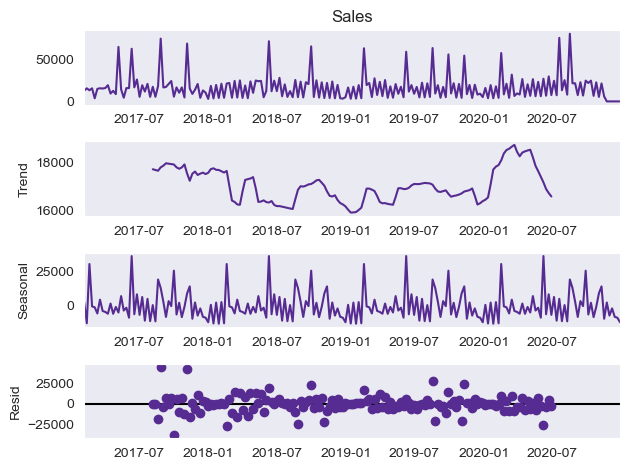

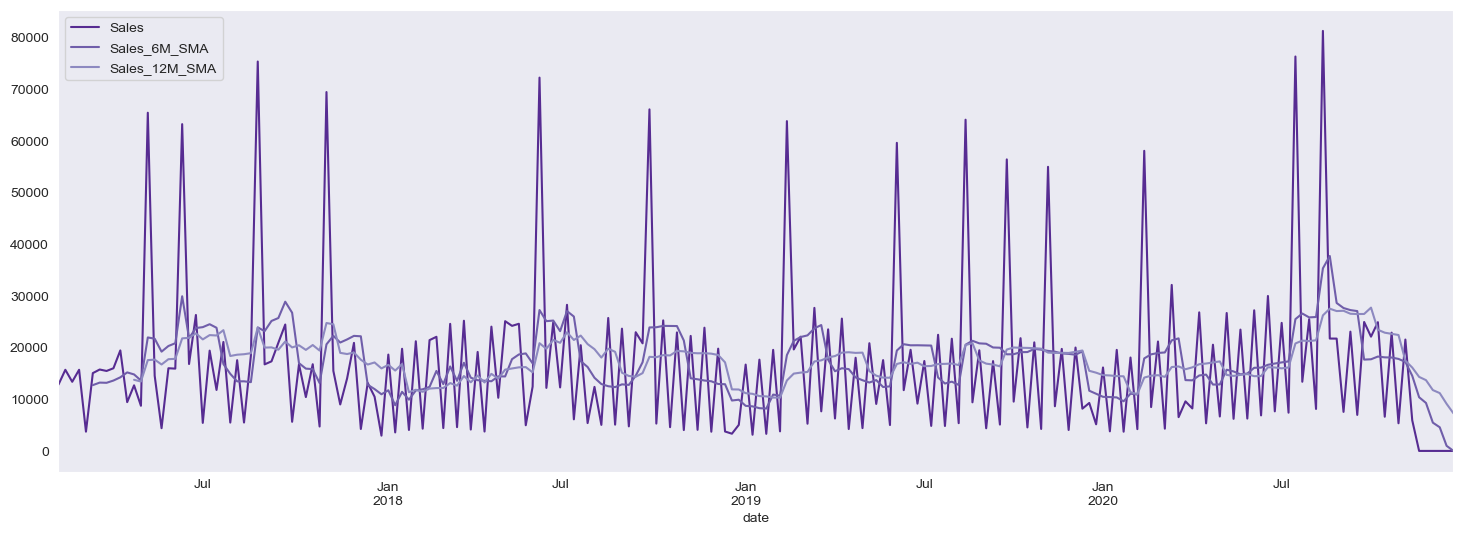

In [49]:
#Product 4
seasonalDecomp(product4)

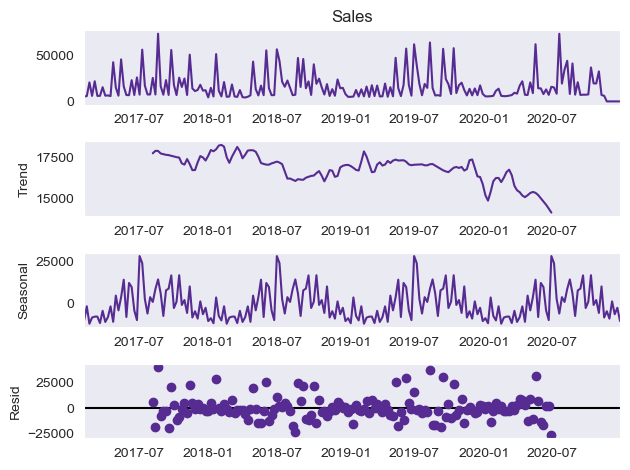

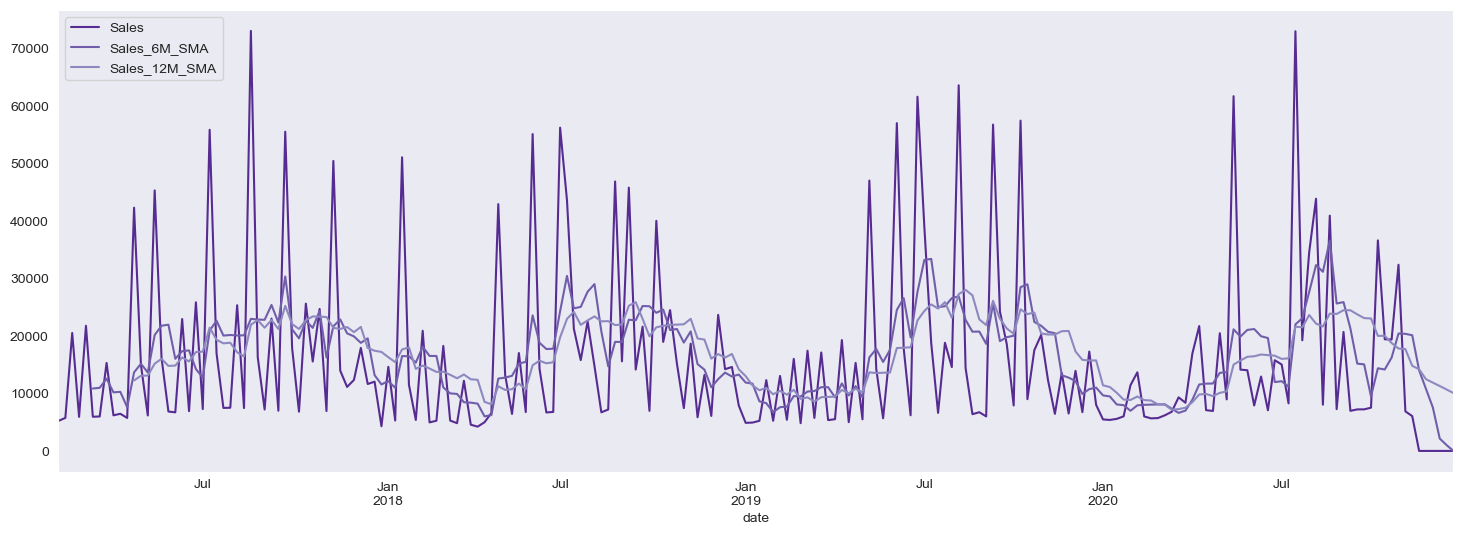

In [50]:
#Product 5
seasonalDecomp(product5)

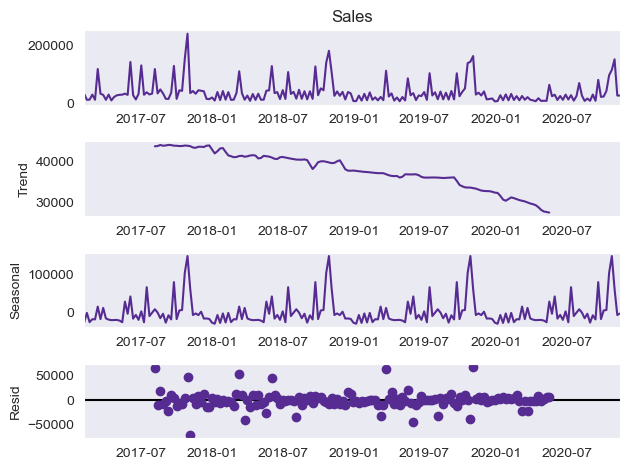

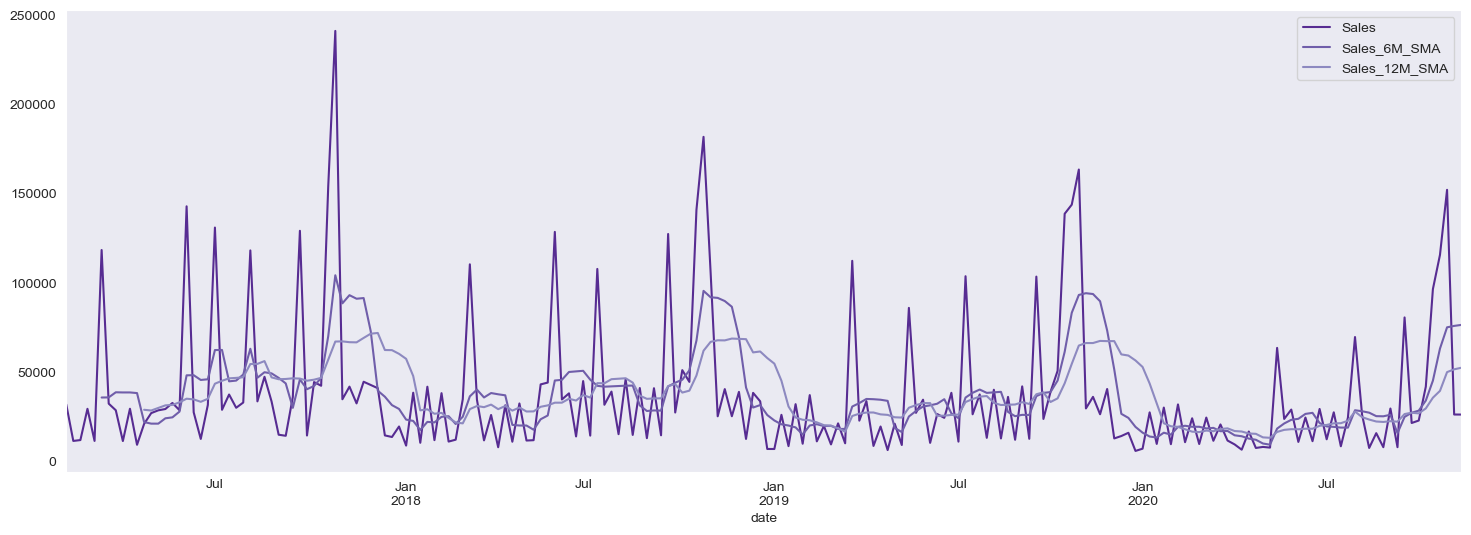

In [51]:
#Product 6
seasonalDecomp(product6)

## Profile Report